# DS 3000 - Assignment 7

**Student Name**: David Yu

**Date**: 2/19/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: Predicting Meat Consumption (50 pts)
(0 pts) Load the data directly from the URL. Ensure that you inspect the data, so that you know how to identify the necessary columns.
Note: this is an alternate link that can be used to load the data: https://drive.google.com/uc?id=1mEewmIvXA57H3upxkqx9vkZfKch9oDsL

In [1]:
import pandas as pd

df = pd.read_csv('DP_LIVE_26102023160103370.csv')

## Question 2: 
(10 pts) Extract the meat consumption data for any three countries of your choice and evaluate the patterns and trends in their meat consumption. You can explore any (2) types of meat (from the chosen countries), and you should only select one unit of measurement**. Ensure that you visualize the data and explain your findings.


In [5]:
import matplotlib.pyplot as plt

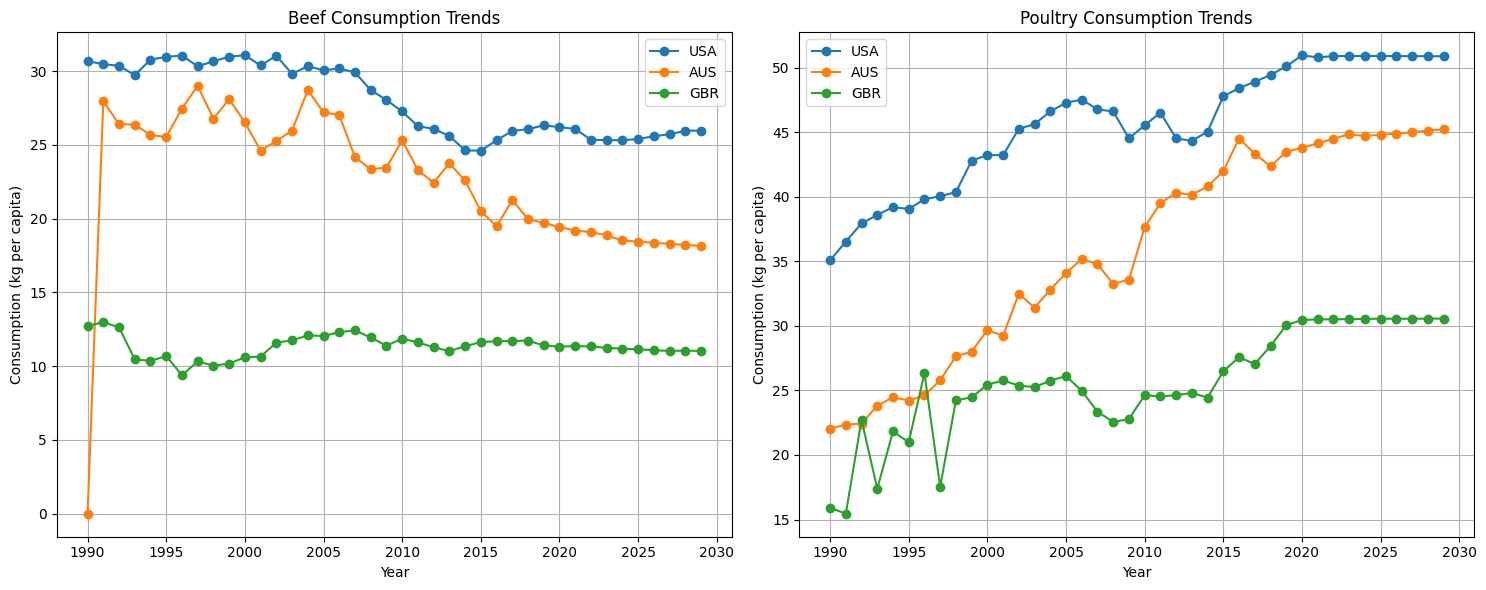

In [6]:
selected_countries = ['USA', 'AUS', 'GBR']
selected_meats = ['BEEF', 'POULTRY']
filtered_df = df[
    (df['LOCATION'].isin(selected_countries)) & 
    (df['SUBJECT'].isin(selected_meats)) &
    (df['MEASURE'] == 'KG_CAP')
]

plt.figure(figsize=(15, 6))

# Beef Plot
plt.subplot(1, 2, 1)
for country in selected_countries:
    beef_data = filtered_df[
        (filtered_df['LOCATION'] == country) & 
        (filtered_df['SUBJECT'] == 'BEEF')
    ]
    plt.plot(beef_data['TIME'], beef_data['Value'], marker='o', label=country)

plt.title('Beef Consumption Trends')
plt.xlabel('Year')
plt.ylabel('Consumption (kg per capita)')
plt.legend()
plt.grid(True)

# Poultry Plot
plt.subplot(1, 2, 2)
for country in selected_countries:
    poultry_data = filtered_df[
        (filtered_df['LOCATION'] == country) & 
        (filtered_df['SUBJECT'] == 'POULTRY')
    ]
    plt.plot(poultry_data['TIME'], poultry_data['Value'], marker='o', label=country)

plt.title('Poultry Consumption Trends')
plt.xlabel('Year')
plt.ylabel('Consumption (kg per capita)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Patterns and Trends Noticed:
- USA has the highest beef consumption, followed by Australia. Great Britain shows significantly less beef consumption compared to the other 2 countries.
- USA and Australia both show a steady decline in beef consumption as time passes. At the same time, poultry consumption increases as time passes for USA and Australia.
- The consumption gaps between all three countries is the smallest for poultry consumption.
- By the time 2030 comes, the graphes seem to show a steady consumption of both poultry and beef.

## Question 3: 
(5 pts) Extract the poultry consumption data, from 1994 to 2014 (inclusive), for Mexico, that is measured in thousand tonnes of carcass weight**. Note: the filtered dataframe should only contain the time and the values.


In [10]:
mexico_poultry = df[
    (df['LOCATION'] == 'MEX') & 
    (df['SUBJECT'] == 'POULTRY') & 
    (df['TIME'].between(1994, 2014)) & 
    (df['MEASURE'] == 'THND_TONNE')
][['TIME', 'Value']]

mexico_poultry['Value'] = mexico_poultry['Value'].round(2)

print("Poultry Consumption for Mexico (1994-2014):")
print(mexico_poultry)

Poultry Consumption for Mexico (1994-2014):
      TIME    Value
9644  1994  1369.91
9645  1995  1515.52
9646  1996  1505.32
9647  1997  1750.50
9648  1998  1931.27
9649  1999  2080.25
9650  2000  2229.97
9651  2001  2351.66
9652  2002  2516.81
9653  2003  2686.01
9654  2004  2783.34
9655  2005  3029.62
9656  2006  3112.79
9657  2007  3167.94
9658  2008  3261.93
9659  2009  3314.59
9660  2010  3421.16
9661  2011  3532.20
9662  2012  3612.90
9663  2013  3690.32
9664  2014  3801.83


## Question 4: 
(5 pts) Summarize the extracted data using descriptive statistics. Explain the statistical summary.
NOTE: this question requires that you evaluate and explain the distribution. Do not simply display the descriptive statistics or say "the maximum values are higher than the average".

In [13]:
stats = mexico_poultry['Value'].describe().round(2)
print("\nDescriptive Statistics:")
print(stats)


Descriptive Statistics:
count      21.00
mean     2698.37
std       783.94
min      1369.91
25%      2080.25
50%      2783.34
75%      3314.59
max      3801.83
Name: Value, dtype: float64


- With a mean of 2698.37 and a median of 2783.34, the distribution is left skewed since the median is greater than the mean. 
- The standard deviation of 783.94 shows that the distribution varies a lot. This is pretty accurate as we can see there is a lot of significant changes in consumption over time.
- The range spans from 1369.91 to 3801.83 shows that there is a huge increase in consumption over the time frame.

Overall, these descriptive statistics show a consistent and long term increase in poultry consumption in Mexico.

## Question 5: 
(10 pts) Visualize the extracted data, using a line chart, and comment on the trend.

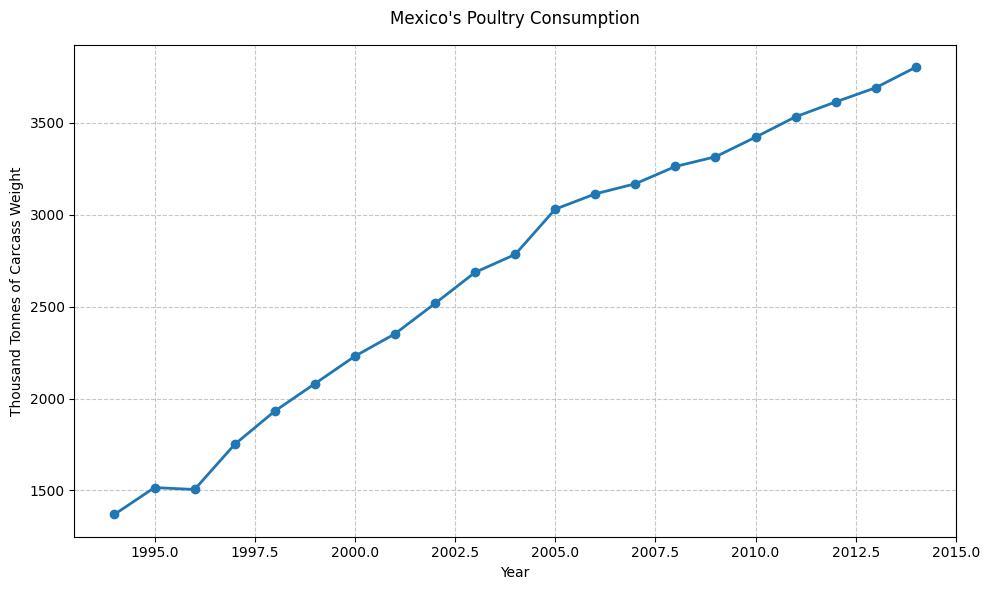

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(mexico_poultry['TIME'], mexico_poultry['Value'], marker='o', linewidth=2)

plt.title('Mexico\'s Poultry Consumption', fontsize=12, pad=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Thousand Tonnes of Carcass Weight', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.grid(True)

plt.tight_layout()

plt.show()

This line chart shows a consistent strong positive linear growth in Mexico's poultry consumption. The growth appears to be relatively steady, suggesting systematic rather than erratic increases. The slope remains relatively positive all throughout the chart, as there is no significant plateus or drops in consumption.

## Question 6:
(15 pts) Predict poultry consumption from 2015 to 2020 using a simple linear regression model.
- Ensure that you visualize the original dataset along with the model's predictions.
- Evaluate the model's predictions against the actual consumption data from 2015 to 2020 and discuss its performance.

In [20]:
import numpy as np

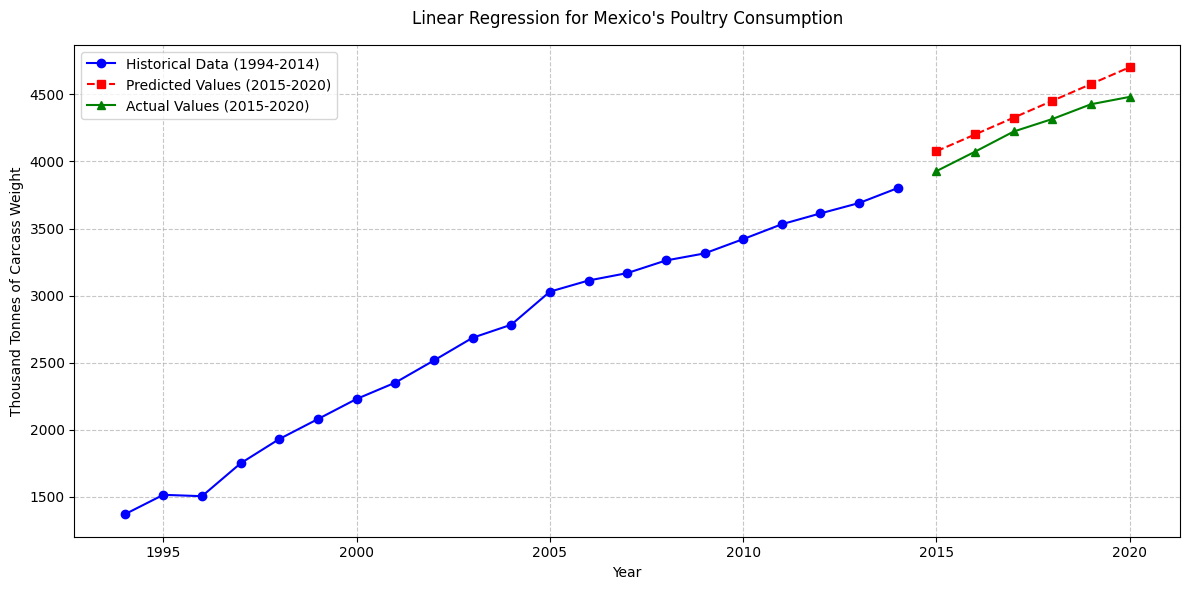

In [24]:
X = mexico_poultry['TIME'].values
y = mexico_poultry['Value'].values

# Slope and intercept
n = len(X)
m = (n * np.sum(X * y) - np.sum(X) * np.sum(y)) / (n * np.sum(X**2) - np.sum(X)**2)
b = (np.sum(y) - m * np.sum(X)) / n

# Prediction with slope and intercept
future_years = np.array(range(2015, 2021))
predictions = m * future_years + b
predictions = np.round(predictions, 2)

actual_data = df[
    (df['LOCATION'] == 'MEX') &
    (df['SUBJECT'] == 'POULTRY') &
    (df['TIME'].between(2015, 2020)) &
    (df['MEASURE'] == 'THND_TONNE')
][['TIME', 'Value']]
actual_data['Value'] = actual_data['Value'].round(2)

plt.figure(figsize=(12, 6))
plt.plot(X, y, marker='o', label='Historical Data (1994-2014)', color='blue')

# Predictions
plt.plot(future_years, predictions, marker='s', 
         label='Predicted Values (2015-2020)', color='red', linestyle='--')

# Actual
plt.plot(actual_data['TIME'], actual_data['Value'], 
         marker='^', label='Actual Values (2015-2020)', color='green')

plt.title('Linear Regression for Mexico\'s Poultry Consumption', fontsize=12, pad=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Thousand Tonnes of Carcass Weight', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

The model overestimates the actual consumption values from 2015 to 2020. The predicted growth and the actual growth are both positive linear growth, but the actual grows at a slower rate than the predicted. Overall, the linear regression model does a solid job of showing the overall upward trend in poultry consumption. It provides a reasonable approximation and it maintains the general direction of growth. However, it is limited in accounting for potential factors that may affect growth. The linear regression model assumes a constant growth rate when there are various outside factors like market changes or economic conditions that may affect the growth of poultry consumption.

## Question 7:
(10 pts) Using a 2-sample t-test**, determine if there is a statistical difference between the price of diamonds with a cut that is considered:
'Good' vs 'Very Good'
'Premium' vs 'Ideal'
**set alpha to 5% i.e. 0.05.

In [25]:
# Calculate t-statistic and mean prices for two groups
def calculate_ttest(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    
    std1 = np.std(group1, ddof=1)
    std2 = np.std(group2, ddof=1)
    
    n1 = len(group1)
    n2 = len(group2)
    
    se = np.sqrt((std1**2/n1) + (std2**2/n2))
    
    t_stat = (mean1 - mean2) / se
    
    df = (std1**2/n1 + std2**2/n2)**2 / (
        (std1**4/(n1**2*(n1-1)) + std2**4/(n2**2*(n2-1)))
    )
    
    return t_stat, mean1, mean2

# Good vs Very Good
good_prices = df[df['cut'] == 'Good']['price']
very_good_prices = df[df['cut'] == 'Very Good']['price']

t_stat1, good_mean, very_good_mean = calculate_ttest(good_prices, very_good_prices)

print("Test 1: Good vs Very Good")
print(f"t-statistic: {t_stat1:.4f}")
print(f"Mean price (Good): ${good_mean:.2f}")
print(f"Mean price (Very Good): ${very_good_mean:.2f}")
print(f"Difference in means: ${very_good_mean - good_mean:.2f}")
print("\nResult: ", "Statistically significant" if abs(t_stat1) > 1.96 else "Not statistically significant")

# Premium vs Ideal
premium_prices = df[df['cut'] == 'Premium']['price']
ideal_prices = df[df['cut'] == 'Ideal']['price']

t_stat2, premium_mean, ideal_mean = calculate_ttest(premium_prices, ideal_prices)

print("\nTest 2: Premium vs Ideal")
print(f"t-statistic: {t_stat2:.4f}")
print(f"Mean price (Premium): ${premium_mean:.2f}")
print(f"Mean price (Ideal): ${ideal_mean:.2f}")
print(f"Difference in means: ${ideal_mean - premium_mean:.2f}")
print("\nResult: ", "Statistically significant" if abs(t_stat2) > 1.96 else "Not statistically significant")

Test 1: Good vs Very Good
t-statistic: -0.8317
Mean price (Good): $3928.86
Mean price (Very Good): $3981.76
Difference in means: $52.90

Result:  Not statistically significant

Test 2: Premium vs Ideal
t-statistic: 24.9179
Mean price (Premium): $4584.26
Mean price (Ideal): $3457.54
Difference in means: $-1126.72

Result:  Statistically significant


### Good vs Very Good:
We have a t-statistic of -0.8317. For a 2 sample test with an alpha of 5%, the critical value is 1.96. Since the t-statistic is less than 1.96, we fail to reject the null hypothesis. The difference in price is not statistically significant. There is not enough statistical evidence to conclude there's a significant price difference between good and very good cuts. 

### Premium vs Ideal:
We have a t-statistic of 24.9179. For a 2 sample test with an alpha of 5%, the critical value is 1.96. Since the t-statistic is greater than 1.96, we reject the null hypothesis. The difference in price between premium and ideal is statistically significant. There is enough evidence to conclude that there's a significant price difference between premium and ideal cuts.

## Question 8: 
(7 pts) [optional/challenge question] Many statistical test rely on the assumption that data is normally distributed. Indicate which distributions in question 6 were skewed, and research one possible technique* that can be used to handle skewed data. Then perform the following:
- Demonstrate the selected technique to correct the skewed data.
- Repeat the analysis in question 6 using the corrected data and explain the difference in the distribution with the previous results.
- Repeat the statistical tests in question 7 using the corrected data. Are there any changes in the statistical significance? Explain the results.

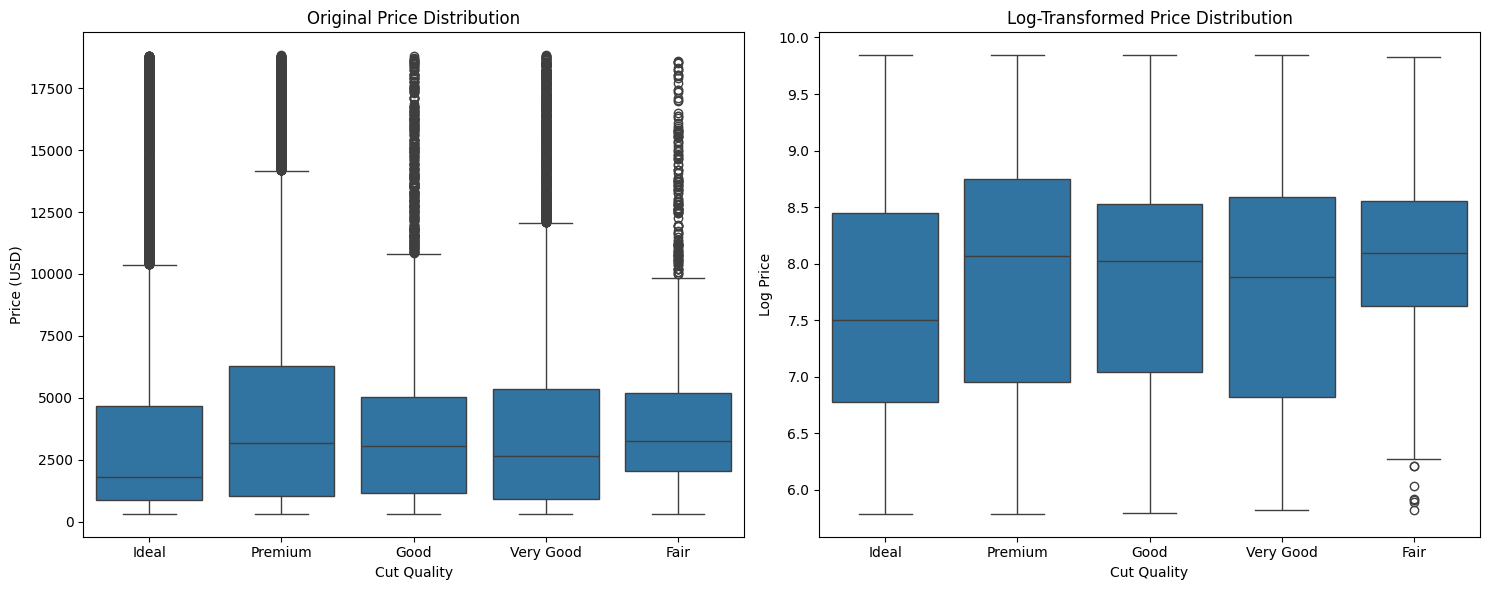

In [ ]:
df['log_price'] = np.log(df['price'])

plt.figure(figsize=(15, 6))

# Original price distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='cut', y='price', data=df)
plt.title('Original Price Distribution')
plt.xlabel('Cut Quality')
plt.ylabel('Price (USD)')

# Log-transformed price distribution
plt.subplot(1, 2, 2)
sns.boxplot(x='cut', y='log_price', data=df)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Cut Quality')
plt.ylabel('Log Price')

plt.tight_layout()
plt.show()

From question 6, all cuts were skewed right. Log transformation is especially effective for right-skewed data. Log transformation is when you take the logarithm of each value in the dataset. This helps with right-skewed data as the bigger values will be more affected by the log than smaller values. Bigger values like outliers will be more compressed than smaller values if we use log transformation. As we can see from the original price distribution and the log-transformed price distribution, the log-transformed price distribution is more symmetrical, has more balanced whiskers, and less outliers. 

In [29]:
# Good vs Very Good
good_prices = df[df['cut'] == 'Good']['log_price']
very_good_prices = df[df['cut'] == 'Very Good']['log_price']

t_stat1, good_mean, very_good_mean = calculate_ttest(good_prices, very_good_prices)

print("\nTest 1 (Log-transformed): Good vs Very Good")
print(f"t-statistic: {t_stat1:.4f}")
print(f"Mean log price (Good): {good_mean:.4f}")
print(f"Mean log price (Very Good): {very_good_mean:.4f}")
print("Result: ", "Statistically significant" if abs(t_stat1) > 1.96 else "Not statistically significant")

# Premium vs Ideal
premium_prices = df[df['cut'] == 'Premium']['log_price']
ideal_prices = df[df['cut'] == 'Ideal']['log_price']

t_stat2, premium_mean, ideal_mean = calculate_ttest(premium_prices, ideal_prices)

print("\nTest 2 (Log-transformed): Premium vs Ideal")
print(f"t-statistic: {t_stat2:.4f}")
print(f"Mean log price (Premium): {premium_mean:.4f}")
print(f"Mean log price (Ideal): {ideal_mean:.4f}")
print("Result: ", "Statistically significant" if abs(t_stat2) > 1.96 else "Not statistically significant")


Test 1 (Log-transformed): Good vs Very Good
t-statistic: 2.6129
Mean log price (Good): 7.8428
Mean log price (Very Good): 7.7987
Result:  Statistically significant

Test 2 (Log-transformed): Premium vs Ideal
t-statistic: 28.1133
Mean log price (Premium): 7.9508
Mean log price (Ideal): 7.6395
Result:  Statistically significant


### Good vs Very Good
The test results for good vs very good cuts have changed. Previously, without the log-transformed dataset, we concluded that the difference in price was not statistically significant. However, after log-transforming the dataset, the difference in price between good and very good cuts is not statisically significant. With the new log-transformed dataset, the t-statistic for good vs very good cuts is 2.6129, which is greater than the critical value of 1.96 for 2 sample tests with an alpha of 5%. Since the t-statistic is greater than the critical value, we can reject the null hypothesis and conclude that the results are statistically significant. There is enough evidence to conclude that there's a significant price difference between good and very good cuts. Removing the right-skewedness helped uncover some notable differences that were previously hidden.

### Premium vs Ideal
The results for premium and ideal cuts stay the same, as their result is still statisically significant. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
